In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_excel("C:\\Users\\Karan Singh\\Downloads\Fraud Data Cleaned.xlsx")

In [3]:
df.head()

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1.0
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1.0
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1.0
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1.0
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1.0


In [4]:
df.tail()

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14441,2019-01-22 00:37:00,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,1976-10-18,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0.0
14442,2019-01-22 00:41:00,"Nienow, Ankunding and Collie",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"Engineer, maintenance",1956-01-09,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0.0
14443,2019-01-22 00:42:00,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"Administrator, local government",1973-05-16,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0.0
14444,2019-01-22 00:48:00,"Bins, Balistreri and Beatty",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0.0
14445,2019-01-22 00:55:00,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0.0


In [5]:
df.shape

(14446, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   trans_date_time  14446 non-null  datetime64[ns]
 1   merchant         14446 non-null  object        
 2   category         14446 non-null  object        
 3   amt              14446 non-null  float64       
 4   city             14446 non-null  object        
 5   state            14446 non-null  object        
 6   lat              14446 non-null  float64       
 7   long             14446 non-null  float64       
 8   city_pop         14446 non-null  int64         
 9   job              14446 non-null  object        
 10  dob              14446 non-null  datetime64[ns]
 11  trans_num        14446 non-null  object        
 12  merch_lat        14446 non-null  float64       
 13  merch_long       14446 non-null  float64       
 14  is_fraud         14444 non-null  float

In [7]:
df.duplicated().sum()

np.int64(63)

In [8]:
df.nunique()

trans_date_time    12126
merchant             693
category              14
amt                 9266
city                 176
state                 13
lat                  183
long                 183
city_pop             174
job                  163
dob                  187
trans_num          14383
merch_lat          14376
merch_long         14380
is_fraud               2
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(63)

In [10]:
df = df.drop_duplicates()

In [11]:
df['is_fraud'] = df['is_fraud'].dropna()

In [12]:
df.shape

(14383, 15)

In [13]:
df['category'].value_counts()

category
grocery_pos       1591
gas_transport     1424
shopping_net      1393
shopping_pos      1347
home              1303
kids_pets         1140
personal_care      988
entertainment      949
health_fitness     890
food_dining        869
misc_pos           821
misc_net           815
grocery_net        469
travel             384
Name: count, dtype: int64

In [14]:
def detect_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - 5 * iqr
    ub = q3 + 5 * iqr

    return df[(df[col] < lb) | (df[col] > ub)]

In [15]:
outliers = detect_outliers(df, 'amt')

In [16]:
outliers

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1.0
8,2019-05-01 18:03:00,McGlynn-Heathcote,misc_net,768.15,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,fba83e0a3adb530251295ab72a96b719,64.623325,-166.403973,1.0
9,2019-05-01 22:02:00,Dooley-Thompson,misc_net,849.49,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,b87c92d4824758e704da572891697fed,65.266065,-164.865352,1.0
10,2019-05-01 22:05:00,"Gottlieb, Considine and Schultz",shopping_net,1177.79,Browning,MO,40.0290,-93.1607,602,Cytogeneticist,1954-07-14,f1c51701d8b5dd6ebfe7c1aebf0c4fe7,39.288305,-92.476947,1.0
13,2019-05-01 22:32:00,Pouros-Haag,shopping_pos,730.78,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-09-11,2396a5b8e277a4ce1d4fa939d6e7b19b,65.233866,-166.550779,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,2019-01-19 23:41:00,"Mosciski, Ziemann and Farrell",shopping_net,1148.09,Glendale,CA,34.1556,-118.2322,172817,Advertising account planner,1982-07-30,e0a5e2bc3586f415f90bd08d6671f955,33.877454,-118.317885,0.0
13693,2019-01-20 05:33:00,Hamill-Daugherty,misc_net,895.51,Mound City,MO,40.1362,-95.2138,1631,Architect,1953-01-20,898bd27250ecdcc0d32c42c881e91a7f,40.622872,-94.965663,0.0
14096,2019-01-21 07:39:00,Kuhic LLC,shopping_net,936.34,Unionville,MO,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,1995c60785d499223f05669edd70e54e,40.274062,-92.676083,0.0
14224,2019-01-21 15:22:00,"Zboncak, Rowe and Murazik",shopping_net,657.66,Jelm,WY,41.0539,-106.0763,100,Public librarian,1974-04-16,b2e8747340c85ab48aab4f6a05341d20,40.082179,-105.733552,0.0


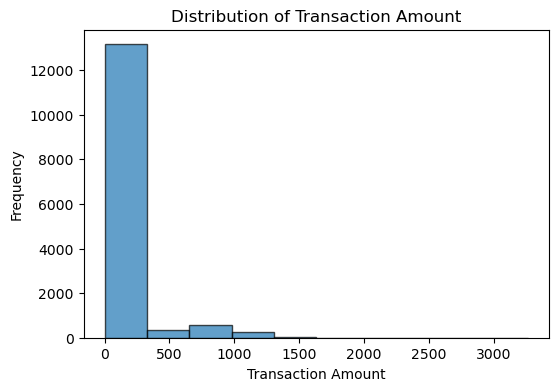

In [17]:
plt.figure(figsize=(6,4))
plt.hist(x=df['amt'], edgecolor='k', alpha=0.7)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amount")
plt.show()

In [18]:
df['hours'] = df['trans_date_time'].dt.hour
df['weekday'] = df['trans_date_time'].dt.day_name()
df['month'] = df['trans_date_time'].dt.month

In [19]:
df['age'] = df['trans_date_time'].dt.year - df['dob'].dt.year 

In [20]:
df['high_amt_flag'] = (df['amt'] > 500).astype(int)

In [21]:
def create_amt_groups(amt):
    if amt <= 500:
        return "Low Range"
    elif amt <= 1500:
        return "Medium Range"
    else:
        return "High Range"
    

In [22]:
df['amt_range'] = df['amt'].apply(create_amt_groups)

In [23]:
df.head()

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,trans_num,merch_lat,merch_long,is_fraud,hours,weekday,month,age,high_amt_flag,amt_range
0,2019-04-01 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1.0,0,Monday,4,80,0,Low Range
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1.0,15,Monday,4,80,1,Medium Range
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1.0,22,Monday,4,80,0,Low Range
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1.0,23,Monday,4,80,0,Low Range
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1.0,23,Monday,4,80,0,Low Range


In [24]:
#Fraud rate by amount range
amt_range_fraud_rate = df.groupby('amt_range')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

In [25]:
def fraud_distribution(xaxis, yaxis, title, xticks=False):
    plt.figure(figsize=(8,4))
    plt.bar(xaxis, yaxis)
    plt.title(f"Fraud Rate by Transaction {title}")
    plt.xlabel(title)
    plt.ylabel("Fraud Rate")
    if xticks:
        plt.xticks(rotation=45)
    plt.show()

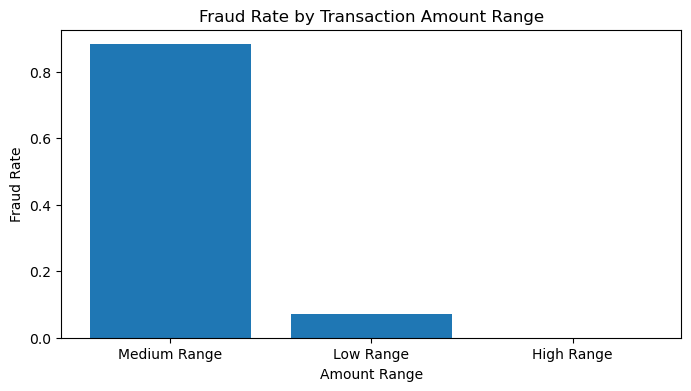

In [26]:
#Plot Distribution
fraud_distribution(amt_range_fraud_rate['amt_range'], amt_range_fraud_rate['fraud_rate'], "Amount Range")

<b>Key Insights</b>
<ol>
    <li>Medium Range transactions has high fraud rate nearly 88%.</li>
    <li>Low Range transactions are rich in volume.</li>
    <li>High Range transaction's fraud rate is negligible (0%).</li>

In [27]:
#Fraud rate by transaction hour
trans_hour_fraud_rate = df.groupby('hours')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

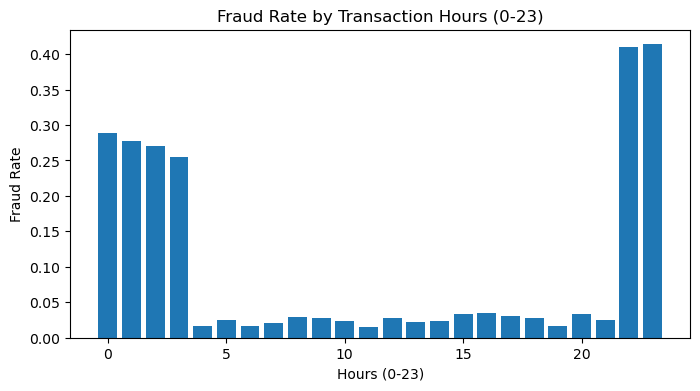

In [28]:
#Plot Distribution
fraud_distribution(trans_hour_fraud_rate['hours'], trans_hour_fraud_rate['fraud_rate'], "Hours (0-23)")

<b>Key Insights</b>
<ol>
    <li>Fraud rate is high during mid-night hours 23 and 22 nearly 40-41%.</li>
    <li>Also, fraud rate is noteable during mid-night hours (0,1,2,3), which clearly shows fraud chances are high during late night hours.</li>
    <li>While fraud rate is less during business hours.</li>

In [29]:
#Fraud rate by days of week
trans_weekday_fraud_rate = df.groupby('weekday')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

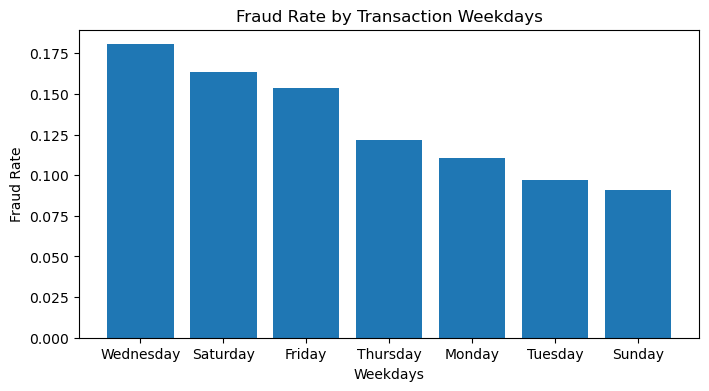

In [30]:
#Plot Distribution
fraud_distribution(trans_weekday_fraud_rate['weekday'],trans_weekday_fraud_rate['fraud_rate'], "Weekdays")

<b>Key Insights</b>
<ol>
    <li>Wed To Fri have high fraud rate nearly 15-18%.</li>
    <li>Tuesday and sunday have less than 10% frauds.</li>
    <li>Frauds are more likely to happen towards the weekends.</li>

In [31]:
#Fraud rate by month
trans_month_fraud_rate = df.groupby('month')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

In [32]:
trans_weekday_fraud_rate

,weekday,trans_count,fraud_rate
6,Wednesday,1269,0.180457
2,Saturday,1560,0.163462
0,Friday,1911,0.153323
4,Thursday,1757,0.121799
1,Monday,2960,0.110473
5,Tuesday,2525,0.097030
3,Sunday,2399,0.090871


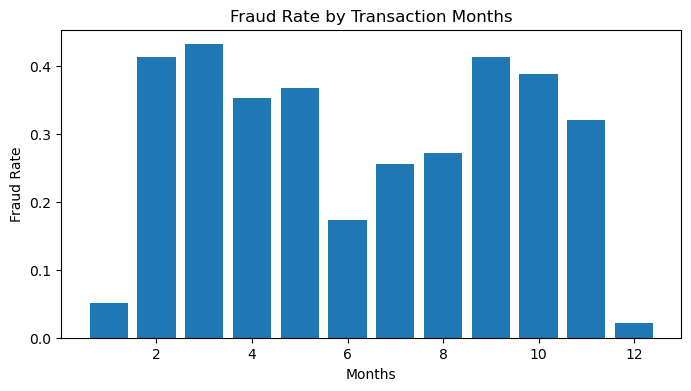

In [33]:
#Plot Distribution
fraud_distribution(trans_month_fraud_rate['month'], trans_month_fraud_rate['fraud_rate'], "Months")

<b>Key Insights</b>
<ol>
    <li>Fraud Rate is high for month of Feb, Mar, Apr, May, Sep, Oct, Nov nearly 35-41%.</li>
    <li>While Jan and Dec has less frauds.</li>
    <li>Fraud rates are not even, seasonal frauds might be the reason.</li>
    

In [34]:
df.head(3)

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,trans_num,merch_lat,merch_long,is_fraud,hours,weekday,month,age,high_amt_flag,amt_range
0,2019-04-01 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1.0,0,Monday,4,80,0,Low Range
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1.0,15,Monday,4,80,1,Medium Range
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1.0,22,Monday,4,80,0,Low Range


In [35]:
#Fraud rate category
category_wise_fraud_rate = df.groupby('category')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

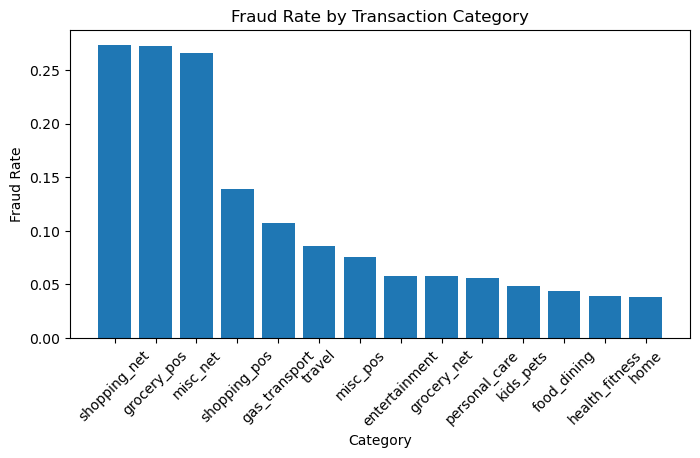

In [36]:
#Plot the graph
fraud_distribution(category_wise_fraud_rate['category'], category_wise_fraud_rate['fraud_rate'], "Category", xticks=True)

In [37]:
#Fraud rate merchant 
merchant_wise_fraud_rate = df.groupby('merchant')['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'trans_count', 'mean':'fraud_rate'}).reset_index().sort_values(by='fraud_rate', ascending=False)

In [38]:
top_10_merchant_frauds = merchant_wise_fraud_rate.head(10)

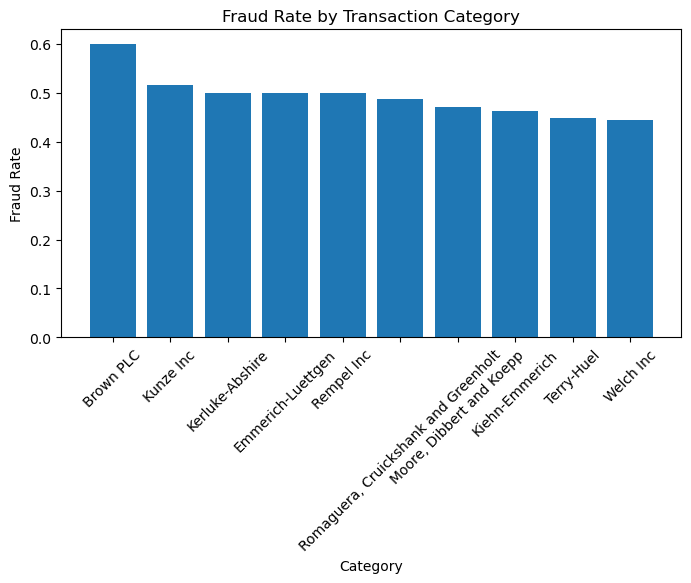

In [39]:
#Plot the graph
fraud_distribution(top_10_merchant_frauds['merchant'], top_10_merchant_frauds['fraud_rate'], "Category", xticks=True)

<b>Key Insights</b>
<ol>
    <li>Fraud Rate is high for merchant Brown PLC with about 60% frauds, followed by Kunze Inc with about 51%.</li>
    <li>Fraud Rate among top 10 merchant frauds ranges from 44-60%.</li>
    

<h3>Rule Based Risk Scoring</h3>

<h4>Amount bucket:</h4>
<ul>
    <li>Low Range - 0 points</li>
    <li>Medium Range - 3 points</li>
    <li>High Range - 0 points</li>
</ul>

<h4>Time (hour):</h4>
<ul>
    <li>22–3 - 3 points</li>
    <li>4–7, 19–21 - 1 point</li>
    <li>8–18 - 0 points</li>
</ul>

<h4>Day of week:</h4>
<ul>
    <li>Wed, Fri, Sat - 2 points</li>
    <li>Mon, Tue, Thu, Sun - 0 points</li>
</ul>

<h4>Category:</h4>
<ul>
    <li>shopping_net, grocery_pos, misc_net - 3 points</li>
    <li>shopping_pos, gas_transport - 1 point</li>
    <li>others - 0 points</li>
</ul>

<h4>Merchant:</h4>
<ul>
    <li>Top‑10 high‑fraud merchants (jo tune nikale) - 4 points</li>
    <li>others - 0 points</li>
</ul>


<h4>risk_score = amount_points + time_points + day_points + category_points + merchant_points</h4>
<ul>
    <li>0–3 - Low risk</li>
    <li>4–7 - Medium risk</li>
    <li>8+ - High risk</li>
</ul>

In [40]:
def calc_amt_points(amt):
    if amt == 'Low Range' or amt == 'High Range':
        return 0
    else:
        return 3

In [41]:
df['amt_points'] = df['amt_range'].apply(calc_amt_points)

In [42]:
def calc_time_points(hours): 
    if hours in [22, 23, 0, 1, 2, 3]:
        return 3
    elif hours in [4, 5, 6, 7, 19, 20, 21]:
        return 1
    else:
        return 0

In [43]:
df['time_points'] = df['hours'].apply(calc_time_points)

In [44]:
def calc_days_points(day): 
    if day[:3] in ['Wed', 'Fri', 'Sat']:
        return 2
    else:
        return 0

In [45]:
df['days_points'] = df['weekday'].apply(calc_days_points)

In [46]:
def calc_category_points(cat):
    if cat in ['shopping_net', 'grocery_pos', 'misc_net']:
        return 3
    elif cat in ['shopping_pos', 'gas_transport']:
        return 1
    else:
        return 0

In [47]:
df['category_points'] = df['category'].apply(calc_category_points)

In [48]:
def calc_merchant_points(merchant):
    if merchant in list(top_10_merchant_frauds.merchant):
        return 4
    else:
        return 0

In [49]:
df['merchant_points'] = df['merchant'].apply(calc_merchant_points)

In [50]:
df['risk_score'] = df.loc[:, list(df.columns)[-5:]].sum(axis=1).astype(int)

In [51]:
df.head()

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,month,age,high_amt_flag,amt_range,amt_points,time_points,days_points,category_points,merchant_points,risk_score
0,2019-04-01 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,4,80,0,Low Range,0,3,0,0,0,3
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,4,80,1,Medium Range,3,0,0,3,0,6
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,4,80,0,Low Range,0,3,0,0,0,3
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,4,80,0,Low Range,0,3,0,3,0,6
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,4,80,0,Low Range,0,3,0,0,0,3


In [52]:
def identify_risk(score):
    if score <= 3:
        return 'Low Risk'
    elif score <= 7:
        return 'Medium Risk'
    else:
        return "High Risk"

In [53]:
df['risk_band'] = df['risk_score'].apply(identify_risk)

In [54]:
df.head()

,trans_date_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,age,high_amt_flag,amt_range,amt_points,time_points,days_points,category_points,merchant_points,risk_score,risk_band
0,2019-04-01 00:58:00,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,80,0,Low Range,0,3,0,0,0,3,Low Risk
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,80,1,Medium Range,3,0,0,3,0,6,Medium Risk
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,80,0,Low Range,0,3,0,0,0,3,Low Risk
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,80,0,Low Range,0,3,0,3,0,6,Medium Risk
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",...,80,0,Low Range,0,3,0,0,0,3,Low Risk


In [55]:
risk_distribution = df.groupby('risk_band')['is_fraud'].agg(["count", "mean"]).reset_index().sort_values(by='mean', ascending=False)

In [56]:
risk_distribution['mean'] = np.round(risk_distribution['mean'], 2)

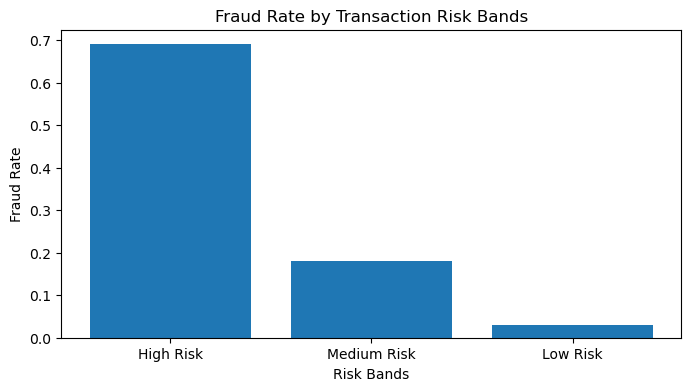

In [57]:
#Plot the graph
fraud_distribution(risk_distribution['risk_band'], risk_distribution['mean'], "Risk Bands")

<h3>Conclusion</h3>
Designed a rule‑based risk score combining amount, time, day, category, and merchant signals. The model segments transactions into Low, Medium, and High risk, with observed fraud rates of ~3.6%, ~24.3%, and ~55.7% respectively, showing clear risk separation.

In [59]:
df.to_csv("Fraud Data Analysis.csv", index=False)